# Let's test how to load and manipulate a Nexus File #

### A few words on the Nexus hierarchical structure and classes ###

NeXus Objects are used to handle Xray and muon experiment with a domanin specific dictionary 
evaluated by NIAC supervision.
Community users can submit dictionary implementations
related to the full description of their measurements data

Nexus files are suitable for __raw data__ as well as for
__processed data__. <br>
NeXus data is stored as a hierarchical tree structure The structure is made of groups, fields, attributes and links groups are containers /folders of fields and other groups fields are array and scalars attributes are extra info of groups and fields

Base classes are standard objects for describing the experiment each group has a name and a class defining it. the class define the type of object, the name identifies it

the base class definitions and application definitions contain all the components to built a data file

The further developement of Nexus classes is under the NIAC supervision NXentry is the root level of Nexus file containing all the data and
descriptors Nxdata contains the array of data and axes definition other classes allow the description of acquisition and processing settings

The NXfield class wraps standard NumPy arrays, scalars, and attributes /additional metadata
For the latter there is a dedicated entry for the data processing documentation 


groups are containers /folders of fields and other groups fields are array and scalars attributes are extra info of groups and fields

Base classes are standard objects for describing the experiment each group has a name and a class defining it. the class define the type of object, the name identifies it

the base class definitions and application definitions contain all the components to built a data file

The further developement of Nexus classes is under the NIAC supervision NXentry is the root level of Nexus file containing all the data and
descriptors Nxdata contains the array of data and axes definition other classes allow the description of acquisition and processing settings
here are three ways to create an NXfield.

    Direct assignment:

x = NXfield(np.linspace(0,2*np.pi,101), units='degree')


    The data value is given by the first positional argument, and may be a Python scalar or string, or a NumPy array. In this method, keyword arguments can be used to define NXfield attributes.

    Attribute assignment as the child of a NeXus group:

    a.entry.sample.temperature=40.0

    The assigned values are automatically converted to an NXfield:

    a.entry.sample.temperature
    NXfield(40.0)

    Dictionary assignment to the NeXus group:

    a['entry/sample/temperature']=40.0

    This is equivalent to the second method, but should be used if there is a danger of a name clash with an NXfield method, e.g., if the NXfield is called ‘plot’.
NeXus attributes
Nexus Standars are the application definitions
The structure is made of groups, fields and attributes
NeXus data values are stored in NeXus objects of class ‘NXfield’. 
The NXfield class wraps standard NumPy arrays, scalars, and Python strings so that additional metadata
(or attributes) and methods can be associated with them.

## Case 1: Load a file compatible with icat ingestion ##

The Nexus structure consists of groups, fields, attributes and 
links.

We use Python shell and built in functions to:<br>
handle array of data <br>
plot the data array <br>
handle xml structures

We also use a python package to read HDF5 file formats

In [2]:
from nexusformat.nexus import *
from matplotlib import pyplot as plt
import numpy as np
import  json
import h5py
from dicttoxml import dicttoxml

We load a Nexus file created by Gerrit Gunther for the icat ingestion

In [3]:
path='/home/luigia/Documents/metadata_course/data_public1_HZB/'
filename='Ni01CO04_001_2020-07-02.nxs'
#%2021-03-Dy01Cp02_2.nxs'
fp=path+filename
a=nxload(fp)

Let's have a look at the file structure and its content

We handle the object a as a dictionary and we use the dictionary exploration tools in Python

In [4]:
print(a)
a.keys()

root


dict_keys(['background', 'entry'])

For this specific case the object entries are 2: one is called background, the other entry. <br>
    They refer to data relative to the tests on the instruments and the measurements data on a sample.<br>
    The keys __background__ and __entry__ help to distinguish the 2 groups of data

## Explore the file content ##

#### Visualize the dictionary keys ####

In [14]:
a['/entry'].keys()

dict_keys(['definition', 'start_time', 'entry_identifier', 'experiment_identifier', 'user1', 'notes', 'instrument', 'integrated_intensity', 'sample', 'data'])

#### Access the data and plot them ####

Note that the axis and title labels are already given in the Nx group data

[ 9.0790e-15 -6.8904e-15  3.9614e-15 ...  1.2817e-14  1.3788e-14
  1.8786e-14]


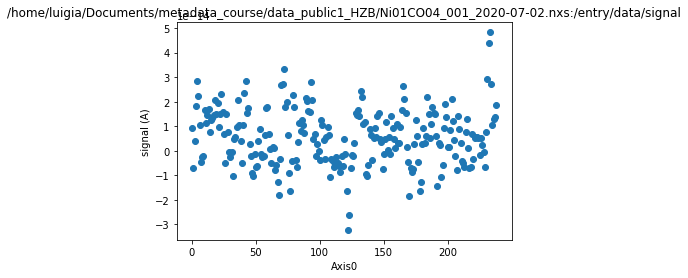

In [12]:
b=(a['/entry/data/signal'])
print(b)
b.plot()


#### Visualize which Nexus application has been used to describe these data ####

In [15]:
a['/background']

NXxas('background')

More on the NXxas application: https://manual.nexusformat.org/classes/applications/NXxas.html

When using an application is mandatory to consider which elements are required 

In [24]:
a['/entry1/comment']
print(a['/entry1/comment'])
print(a['/entry1/instrument'])

comment
instrument


In [25]:
print(a['/entry1/sample'])
print(a['/entry1/sample'].keys())

sample
dict_keys(['name', 'pressure_env', 'temperature', 'temperature_env'])


In [37]:
a.entry1.sample

NXsample('sample')

In [ ]:
#print(a['/entry1/comment'].keys())
#print(a['/entry1/comment/data']
#print(a['/entry1/sample'].keys())
#print(a['/entry1/comment'])
#print(a['/entry1/comment/data'].keys())
#print(a['/entry1/comment/data'])
#print(a['/entry1/'].keys())
#print(a['/entry1/instrument'].keys())
#      print(a['/entry1/instrument/detector1'].keys())
#print(a['/entry1/instrument/detector1/type'].keys())
#print(a['/entry1/instrument/detector1/type'])
#print(a['/entry1/instrument/detector1/type'])
#print(a['/entry1/instrument/detector1/data'])


In [38]:
print(a.entry1.sample)

sample


In [40]:
print(a.entry1.keys())

dict_keys(['comment', 'control', 'data', 'definition', 'entry_identifier', 'experiment_identifier', 'instrument', 'intensityIntegrationProcess', 'related_files', 'sample', 'start_time', 'user'])


In [41]:
a.entry1.control

NXmonitor('control')

In [42]:
a.entry1.data

NXdata('data')

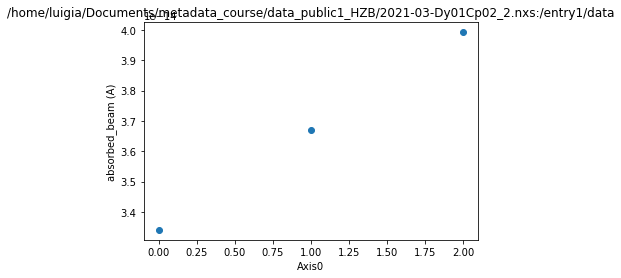

In [43]:
a.entry1.data.plot()

In [44]:
a.entry1.keys()

dict_keys(['comment', 'control', 'data', 'definition', 'entry_identifier', 'experiment_identifier', 'instrument', 'intensityIntegrationProcess', 'related_files', 'sample', 'start_time', 'user'])

In [45]:
a.entry1.instrument

NXinstrument('instrument')

In [46]:
a.entry1.control

NXmonitor('control')

In [48]:
a.entry1.instrument.keys()

dict_keys(['detector1', 'detector2', 'detector3', 'insertion_device', 'monochromator', 'name', 'slitwidth', 'source'])

In [50]:
a.entry1.instrument.detector1

NXdetector('detector1')

In [52]:
a.entry1.instrument.detector1.type

NXfield('photo diode')

https://manual.nexusformat.org/classes/base_classes/index.html

# visualize the Nexus structure as an xml file

In [15]:
b=(a.keys())
xml=dicttoxml(b)
print(xml)


b'<?xml version="1.0" encoding="UTF-8" ?><root><item type="str">entry1</item><item type="str">entry2</item></root>'


In [35]:
from flatten_dict import flatten
filename=path+'icatParameterList.json'
fo=open(filename)
icat_dict=json.load(fo)
print(icat_dict)

{'nxs/entry/program_name': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/comment/data': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/intensityIntegrationProcess/intensity': {'type': 'NUMERIC', 'units': 'a.u.'}, 'nxs/entry/intensityIntegrationProcess/mode': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/data/absorbed_beam': {'type': 'NUMERIC', 'units': 'A'}, 'nxs/entry/data/energy': {'type': 'NUMERIC', 'units': 'eV'}, 'nxs/entry/instrument/detector1/long_name': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/instrument/detector1/short_name': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/instrument/detector1/data': {'type': 'NUMERIC', 'units': 'A'}, 'nxs/entry/instrument/detector1/type': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/instrument/detector2/long_name': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/instrument/detector2/short_name': {'type': 'STRING', 'units': 'N/A'}, 'nxs/entry/instrument/detector2/flux': {'type': 'NUMERIC', 'units': 'Hz'}, 'nxs/entry/instrument/detector

Using h5py to open the Nexus file

In [23]:
f=h5py.File(fp,"r")
f.attrs.keys()
for item in f.attrs.keys():
        print(item+":",f.attrs[item])

f['/entry1'].keys()

#%%%%use this dictionary by changing the entries and attaching another dataset%%%%%


default: entry1


<KeysViewHDF5 ['comment', 'control', 'data', 'definition', 'entry_identifier', 'experiment_identifier', 'instrument', 'intensityIntegrationProcess', 'related_files', 'sample', 'start_time', 'user']>

In [28]:
print(f)

<HDF5 file "2021-03-Dy01Cp02_2.nxs" (mode r)>


In [34]:
print(f['/entry1/sample/temperature_env'].keys())

<KeysViewHDF5 ['temperature1', 'temperature2', 'temperature3', 'temperature4']>


In [36]:
f.entry1

AttributeError: 'File' object has no attribute 'entry1'